In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
main_copy_dir = os.path.join(parent_dir, "main_copy")
octagon_analysis = os.path.join(parent_dir, "octagon_analysis")
sys.path.append(main_copy_dir)
sys.path.append(octagon_analysis)

print("Added paths to sys.path:", main_copy_dir, octagon_analysis)

Added paths to sys.path: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy /Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis


In [2]:
#imports
%load_ext autoreload
%autoreload 2
import scipy
import parse_data.prepare_data as prepare_data
import numpy as np
import pandas as pd
from parse_data import preprocess
import matplotlib as mpl
import matplotlib.pyplot as plt
import globals
import plotting.plot_trajectory as plot_trajectory
import plotting.plot_octagon as plot_octagon
import data_extraction.extract_trial as extract_trial
import data_extraction.trial_list_filters as trial_list_filters
import math
import trajectory_analysis.trajectory_vectors as trajectory_vectors
import trajectory_analysis.trajectory_headangle as trajectory_headangle
from IPython.display import Image, display
import data_extraction.get_indices as get_indices
import prominent_direction_functions as prominent_direction_functions
import flip_rotate_headangle_functions
import headangle_analysis_plotting_functions
import headangle_bin_assignment_new
import analysis.wall_visibility_and_choice as wall_visibility_and_choice
import calculate_probabilities_functions
import plot_headangle_vectors_colour_map

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data_folder = '/Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis'

json_filenames_all_social = [r'Json_data/2024-11-19_15-22-56_SophiaHocineSocial.json',
                                r'Json_data/2024-11-12_13-31-14_KhadijaWendySocial.json', 
                                r'Json_data/2024-12-19_15-28-24_JingjingYeungSocial.json', 
                                r'Json_data/2024-10-17_16-41-38_ZimoElsaSocial.json', 
                                r'Json_data/2025-01-15_15-21-27_YixuanMarcoSocial.json',
                                r'Json_data/2024-11-13_14-18-54_NasiaRyanSocial.json', 
                                r'Json_data/2024-11-19_14-24-49_AmyXinyuanSocial.json', 
                                r'Json_data/2024-09-27_14-25-20_SaraEmilySocial.json', 
                                r'Json_data/2024-11-12_15-23-24_FrancescaSenSzeSocial.json', 
                                r'Json_data/2024-10-17_14-28-40_ShamirAbigailSocial.json',
                                r'Json_data/2024-09-13_11-31-00_YansuJerrySocial.json', 
                                r'Json_data/2024-11-20_14-17-44_JasonRahulSocial.json',
                                r'Json_data/2024-11-13_15-28-07_YichuanHoiSocial.json',
                                r'Json_data/2024-11-20_15-16-21_SunnyVinceSocial.json']

 

In [4]:
df, trial_lists = prepare_data.prepare_data(data_folder, json_filenames_all_social, combine=False)

filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-11-19_15-22-56_SophiaHocineSocial.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-11-12_13-31-14_KhadijaWendySocial.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-12-19_15-28-24_JingjingYeungSocial.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-10-17_16-41-38_ZimoElsaSocial.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2025-01-15_15-21-27_YixuanMarcoSocial.json
Loading complete.
Preprocessing complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-11-13_14-18-54_NasiaRyanSocial.json
Loading com

In [274]:
example_list=trial_lists[8]

In [261]:
len(example_list)

125

In [77]:
def wall_first_visible_filtering(trial_list, player_id, inferred_choice, fov, wall_visible_index, both=False):
    '''
    Returns filtered trial list for trials where wall with given wall_index is the first visible wall 
    If both is True, returns filtered trial list for trials where both walls are visible at slice onset.
    Added retrievable choice filter.
    '''
    trial_list_filtered, original_indices = trial_list_filters.filter_trials_retrievable_choice(trial_list, player_id, inferred_choice, original_indices=None)
    print(len(original_indices))
    if both:
        trial_list_filtered, original_indices = trial_list_filters.filter_trials_both_walls_initially_visible(trial_list_filtered, player_id, fov, original_indices=original_indices)
        print(original_indices)
    else: 
        trial_list_filtered, original_indices = trial_list_filters.filter_trials_one_wall_becomes_visible_first(trial_list_filtered, player_id, fov, wall_visible_index, original_indices=original_indices)
        print(original_indices)
    return trial_list_filtered, original_indices

In [79]:
trial_list_testing_walls, original_indices_testing_walls = wall_first_visible_filtering(example_list, 0, True, 110, 1, both=False)

115
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
And the number of valid trials at this step is 39
[  4   8   9  11  15  16  18  21  29  33  35  36  40  42  43  44  47  52
  55  56  58  61  65  67  68  69  70  76  80  85  87  89  92  96  99 102
 105 108 111]


In [81]:
len(trial_list_testing_walls)

39

In [82]:
player_choice = wall_visibility_and_choice.get_player_wall_choice(
                trial_list_testing_walls, 0, inferred_choice=True, debug=False
            )
wall_chosen = get_indices.was_given_wall_chosen(trial_list_testing_walls, player_choice, 0)


In [83]:
print(player_choice)
print(wall_chosen)

[7. 3. 8. 6. 3. 5. 7. 8. 8. 2. 8. 1. 1. 1. 8. 4. 4. 5. 2. 4. 4. 3. 1. 4.
 8. 3. 3. 1. 6. 1. 2. 7. 4. 5. 6. 3. 7. 2. 1.]
[1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]


In [29]:
trial_list_testing_walls, original_indices_testing_walls = wall_first_visible_filtering(example_list, 0, True, 110, 1, both=False)

115
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
And the number of valid trials at this step is 39
[  4   8   9  11  15  16  18  21  29  33  35  36  40  42  43  44  47  52
  55  56  58  61  65  67  68  69  70  76  80  85  87  89  92  96  99 102
 105 108 111]


In [90]:
print(trial_list_testing_walls)

[                   timeLocal        timeApplication eventDescription  data.playerPosition.0.clientId  data.playerPosition.0.location.x  data.playerPosition.0.location.y  data.playerPosition.0.location.z  data.playerPosition.0.rotation.x  data.playerPosition.0.rotation.y  data.playerPosition.0.rotation.z  data.playerPosition.1.clientId  data.playerPosition.1.location.x  data.playerPosition.1.location.y  data.playerPosition.1.location.z  data.playerPosition.1.rotation.x  data.playerPosition.1.rotation.y  data.playerPosition.1.rotation.z  data.trialNum data.trialType  data.wall1  data.wall2  data.wallTriggered  data.triggerClient  data.playerScores.0  data.playerScores.1         timeReferenced    trial_epoch
4441 1900-01-01 15:25:38.513 0 days 00:02:29.756000      trial start                             0.0                       1.088588476                       1.984999776                      19.636611938                      37.607807159                      19.419487000              

In [134]:
def get_trials_headangle_bin(trial_list, player_id, head_angle_bin, updated=False):
    '''
    If updated is True, the trial list is flipped and rotated before bin assignment.
    Assigns head angle bins at slice onset for all trials in trial list for all players.
    If the head angle bin in the trial is the head angle bin fed to the function, the trial index is stored in trial_indices.
    '''
    trial_indices = {}

    if updated:
        trial_list = flip_rotate_headangle_functions.process_and_update_trials(trial_list, player_id)
    else: 
        trial_list=trial_list
        
    bin_assignments = headangle_bin_assignment_new.assign_bins_to_all_trials(trial_list)

    selected_indices = [i for i, bin_value in enumerate(bin_assignments[player_id]) if bin_value == head_angle_bin]
        
    trial_indices[head_angle_bin] = np.asarray(selected_indices)

    return trial_indices

In [135]:
trial_indices=get_trials_headangle_bin(trial_list_testing_walls, 0, 5, updated=True)

In [136]:
print(trial_indices)

{5: array([ 1,  2, 10, 13, 14, 15, 17, 21, 26, 27])}


In [43]:
def filter_trials_headangle_bin(trial_list, player_id, head_angle_bin=None, updated=False, original_indices=None):
    '''
    Uses trial indices for trials with a given head angle bin at slice onset for a given player 
    to create a new filtered trial list. Loops over all head angle bins if head angle bin is None.
    '''
    
    if original_indices is None:
        original_indices = np.arange(len(trial_list))

    if updated:
        trial_list = flip_rotate_headangle_functions.process_and_update_trials(trial_list, player_id)
    else: 
        trial_list = trial_list

    head_angle_bins = [head_angle_bin] if head_angle_bin is not None else list(range(1,9))

    trial_list_filtered_per_bin = {}
    original_indices_per_bin = {}
    
    
    for bin_value in head_angle_bins:
        
        headangle_bin_indices = get_trials_headangle_bin(trial_list, player_id, bin_value, updated=False)

        #check if we have valid indices for the given bin_value (and no NaN values)
        bin_trial_indices = headangle_bin_indices.get(bin_value, [])

        #filter out np.nan's
        bin_trial_indices = [idx for idx in bin_trial_indices if not np.isnan(idx)]

        
        if len(bin_trial_indices) > 0:
            #print(f"headangle_bin_indices: {headangle_bin_indices}")
            #print(f"bin trial indices: {bin_trial_indices}")
            
            trial_list_filtered_per_bin[bin_value] = [trial_list[i] for i in bin_trial_indices]
            original_indices_per_bin[bin_value] = original_indices[bin_trial_indices]

        else:
            #print("No trials given filters or NaN indices")
            trial_list_filtered_per_bin[bin_value] = []
            original_indices_per_bin[bin_value] = []
            
    return trial_list_filtered_per_bin, original_indices_per_bin

In [138]:
trial_list_filtered, original_indices = filter_trials_headangle_bin(trial_list_testing_walls, 0, 5, updated=True)

In [144]:
len(trial_list_filtered[5])
print(original_indices)

{5: array([ 1,  2, 10, 13, 14, 15, 17, 21, 26, 27])}


In [141]:
def get_trials_headangle_bin_and_choice(
    trial_list, player_id, wall, head_angle_bin=None, choice=False, updated=False
):
    '''
    Gets trial indices for a given head angle bin at slice onset for a given player.
    If head_angle_bin is None, it loops over all head angle bins from 1 to 8 and returns trial indices for each.
    If choice is True, the wall (its index) is taken to check that it corresponds to the player's actual choice.
    '''
    
    trial_indices = {}
    
    #filter trial list by head angle bin at slice onset
    #bins are for flipped and rotated trials if updated is set to True
    if updated:
        mod_trial_list = flip_rotate_headangle_functions.process_and_update_trials(trial_list, player_id)
    else: mod_trial_list = trial_list
    
    head_angle_bins = [head_angle_bin] if head_angle_bin is not None else list(range(1, 9))

    for bin_value in head_angle_bins:
        filtered_trial_list, original_indices = filter_trials_headangle_bin(
        mod_trial_list, player_id, bin_value, updated=False, original_indices=None)

        if choice:

            # Filter by wall choice if choice is True
            player_choice = wall_visibility_and_choice.get_player_wall_choice(
                trial_list, player_id, inferred_choice=True, debug=False
            )
            wall_chosen = get_indices.was_given_wall_chosen(trial_list, player_choice, wall)

            # Optimize by filtering invalid trials early
            selected_indices = [
                i for i in original_indices[bin_value] if not np.isnan(wall_chosen[i]) and wall_chosen[i]
            ]
            trial_indices[bin_value] = np.asarray(selected_indices)
                    
        else:
            trial_indices[bin_value] = np.asarray(original_indices[bin_value])  #store all indices for this bin

    return trial_indices

In [142]:
choice_indices=get_trials_headangle_bin_and_choice(trial_list_testing_walls, 0, 0, head_angle_bin=5, choice=True, updated=True)

/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:321: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))


In [143]:
print(choice_indices)

{5: array([14, 15, 21, 26, 27])}


In [145]:
def filter_trials_headangle_bin_and_choice(trial_list, player_id, wall_index, head_angle_bin=None, updated=False, original_indices=None):
    '''
    Gets trial indices for trials filtered by head angle bin at slice onset and wall choice.
    get_trials_headangle_bin_and_choice() returns a dictionary containing the trial indices for each bin.
    It then creates two dictionaries, one containing the filtered trials and the other containing the trial indices for each head angle bin.
    '''
    if original_indices is None:
        original_indices = np.arange(len(trial_list))
    
    head_angle_bins = [head_angle_bin] if head_angle_bin is not None else list(range(1, 9))
    
    trial_list_filtered_per_bin = {}
    original_indices_per_bin = {}

    for bin_value in head_angle_bins:
        
        trial_indices = get_trials_headangle_bin_and_choice(trial_list, player_id, wall_index, head_angle_bin=bin_value, choice=True, updated=updated)
        
        bin_trial_indices = trial_indices.get(bin_value, [])

        if len(trial_indices.get(bin_value, [])) != 0:
            bin_trial_indices = trial_indices[bin_value]

            trial_list_filtered_per_bin[bin_value] = [trial_list[i] for i in bin_trial_indices]
            original_indices_per_bin[bin_value] = original_indices[bin_trial_indices] 
    
        else:
            trial_list_filtered_per_bin[bin_value] = []
            original_indices_per_bin[bin_value] = [] 
   
    return trial_list_filtered_per_bin, original_indices_per_bin



In [146]:
trial_list_filtered, original_indices = filter_trials_headangle_bin_and_choice(trial_list_testing_walls, 0, 0, head_angle_bin=5, updated=True, original_indices=None)

In [149]:
len(trial_list_filtered[5])

5

In [151]:
def headangle_bins_analyses_nominator(trial_list, player_id, inferred_choice, fov, wall_visible_index, wall_index, both=False, head_angle_bin=None, updated=False):

    trial_list_filtered, original_indices = wall_first_visible_filtering(trial_list, player_id, inferred_choice, fov, wall_visible_index, both=both)
    trial_list_filtered, original_indices = filter_trials_headangle_bin_and_choice(trial_list_filtered, player_id, wall_index, head_angle_bin=head_angle_bin, updated=updated, original_indices=original_indices)

    return trial_list_filtered, original_indices

In [153]:
nom_list, nom_og_indices = headangle_bins_analyses_nominator(example_list, 0, True, 110, 1, 0, both=False, head_angle_bin=None, updated=True)


115
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
And the number of valid trials at this step is 39
[  4   8   9  11  15  16  18  21  29  33  35  36  40  42  43  44  47  52
  55  56  58  61  65  67  68  69  70  76  80  85  87  89  92  96  99 102
 105 108 111]


In [166]:
print(nom_og_indices[5])

[43 44 61 70 76]


In [160]:
def headangle_bins_analyses_denominator(trial_list, player_id, inferred_choice, fov, wall_visible_index, both=False, head_angle_bin=None, updated=False):
    '''
    returns filtered trial list where wall first visible is wall_visible_index
    and head angle is in head_angle_bin at slice onset (subfunctions loop over all bins when set to None)
    '''
    trial_list_filtered, original_indices = wall_first_visible_filtering(trial_list, player_id, inferred_choice, fov, wall_visible_index, both=both)
    trial_list_filtered, original_indices = filter_trials_headangle_bin(trial_list_filtered, player_id, head_angle_bin=head_angle_bin, updated=updated, original_indices=original_indices)

    
    return trial_list_filtered, original_indices

In [161]:
denom_list, denom_og_indices = headangle_bins_analyses_denominator(example_list, 0, True, 110, 1, both=False, head_angle_bin=None, updated=True)


/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:321: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))


115
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
And the number of valid trials at this step is 39
[  4   8   9  11  15  16  18  21  29  33  35  36  40  42  43  44  47  52
  55  56  58  61  65  67  68  69  70  76  80  85  87  89  92  96  99 102
 105 108 111]


In [164]:
print(denom_og_indices[5])

[ 8  9 35 42 43 44 52 61 70 76]


Computing nominator, denominator and probabilities for plots for:
45°,90°,180°
1) LW visible first
2) HW visible first
3) both walls visible at slice onset

In [306]:
fov=110 #set
wall_index=0 #for p(high)

#change
wall_visible_index=0
wall_sep=4
both=False #set to true for both walls visible at slice onset

updated=True #needed for head angle bins
inferred_choice=True #for socials


In [307]:
filtered_trials_nominator = {}

for session_id, trial_list in enumerate(trial_lists):
    filtered_trials_nominator[session_id] = {}
    #filtering for High-Low
    trial_indices = get_indices.get_trials_trialtype(trial_list, trial_type=globals.HIGH_LOW)
    trial_list = [trial_list[i] for i in trial_indices]

    #filtering for wall separation
    if wall_sep is not None:
        trial_indices = get_indices.get_trials_with_wall_sep(trial_list, wall_sep=wall_sep)
        trial_list = [trial_list[i] for i in trial_indices]


    filtered_trials_nominator[session_id]={'by_player':{}}

    player_ids = [0,1]
    for player_id in player_ids:
        #do the filtering
        trial_list_filtered, _ = headangle_bins_analyses_nominator(trial_list, player_id, inferred_choice, fov, wall_visible_index, wall_index, both=both, head_angle_bin=None, updated=updated)
        #set updated = True to have head angle bin assignments be flipped and rotated for plotting
        #head_angle_bin set to None to loop over bins and return dictionary with trial lists for each bin                                                            

        filtered_trials_nominator[session_id]['by_player'][player_id] = trial_list_filtered

    print(session_id, player_id) 

11
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1.]
And the number of valid trials at this step is 7
[ 0  2  5  6  8  9 10]
6
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[1. 0. 1. 0. 1. 1.]
And the number of valid trials at this step is 4
[ 0  6  9 10]
0 1
10
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[1. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
And the number of valid trials at this step is 4
[ 2  6  9 17]
17
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
And the number of valid trials at this step is 12
[ 3  4  5  7  8  9 10 11 12 13 14 15]
1 1
16
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0.]
And the number of valid trials at this step is 9
[ 0  4  7  8 17 18

In [211]:
print(type(filtered_trials_nominator))
print(len(filtered_trials_nominator[8]['by_player'][1][8]))

<class 'dict'>
0


In [308]:
filtered_trials_denominator = {}

for session_id, trial_list in enumerate(trial_lists):
    filtered_trials_denominator[session_id] = {}
    #filtering for High-Low
    trial_indices = get_indices.get_trials_trialtype(trial_list, trial_type=globals.HIGH_LOW)
    trial_list = [trial_list[i] for i in trial_indices]

    #filtering for wall separation
    if wall_sep is not None:
        trial_indices = get_indices.get_trials_with_wall_sep(trial_list, wall_sep=wall_sep)
        trial_list = [trial_list[i] for i in trial_indices]

    filtered_trials_denominator[session_id]={'by_player':{}}

    player_ids = [0,1]
    for player_id in player_ids:
        #do the filtering
        trial_list_filtered, _ = headangle_bins_analyses_denominator(trial_list, player_id, inferred_choice, fov, wall_visible_index, both=both, head_angle_bin=None, updated=updated)
        #set updated = True to have head angle bin assignments be flipped and rotated for plotting
        #head_angle_bin set to None to loop over bins and return dictionary with trial lists for each bin                                                            

        filtered_trials_denominator[session_id]['by_player'][player_id] = trial_list_filtered

        print(session_id, player_id) 

11
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1.]
And the number of valid trials at this step is 7
[ 0  2  5  6  8  9 10]
0 0
6
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[1. 0. 1. 0. 1. 1.]
And the number of valid trials at this step is 4
[ 0  6  9 10]
0 1
10
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[1. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
And the number of valid trials at this step is 4
[ 2  6  9 17]
1 0
17
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
And the number of valid trials at this step is 12
[ 3  4  5  7  8  9 10 11 12 13 14 15]
1 1
16
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0.]
And the number of valid trials at this step is 9
[ 0  4  7 

In [213]:
print(type(filtered_trials_denominator))
print(len(filtered_trials_denominator[8]['by_player'][1][8]))


<class 'dict'>
0


In [309]:
from collections import defaultdict

total_counts_trials = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {'by_bin': {'total_counts': 0}}))))
true_counts_trials = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {'by_bin': {'true_counts': 0}}))))

# loop over the filtered trials
for session_id in filtered_trials_nominator:
    
    for bin_id in range(1,9):

        total_count = 0
        true_count = 0
    
        for player_id in [0,1]:
            trial_list_filtered_true = filtered_trials_nominator[session_id]['by_player'][player_id][bin_id]
            trial_list_filtered = filtered_trials_denominator[session_id]['by_player'][player_id][bin_id]

            total_count += len(trial_list_filtered)
            true_count += len(trial_list_filtered_true)
            

        # store the final counts for total and true trials
        total_counts_trials[session_id]['by_bin'][bin_id]['total_counts'] = total_count
        true_counts_trials[session_id]['by_bin'][bin_id]['true_counts'] = true_count

        # debug Output
        print(f"Session {session_id}, Bin {bin_id}:")
        print(f"   ➤ Total Trials = {total_count}")
        print(f"   ➤ True Trials = {true_count}")           

Session 0, Bin 1:
   ➤ Total Trials = 1
   ➤ True Trials = 0
Session 0, Bin 2:
   ➤ Total Trials = 1
   ➤ True Trials = 1
Session 0, Bin 3:
   ➤ Total Trials = 5
   ➤ True Trials = 4
Session 0, Bin 4:
   ➤ Total Trials = 0
   ➤ True Trials = 0
Session 0, Bin 5:
   ➤ Total Trials = 0
   ➤ True Trials = 0
Session 0, Bin 6:
   ➤ Total Trials = 0
   ➤ True Trials = 0
Session 0, Bin 7:
   ➤ Total Trials = 1
   ➤ True Trials = 0
Session 0, Bin 8:
   ➤ Total Trials = 3
   ➤ True Trials = 3
Session 1, Bin 1:
   ➤ Total Trials = 6
   ➤ True Trials = 6
Session 1, Bin 2:
   ➤ Total Trials = 3
   ➤ True Trials = 3
Session 1, Bin 3:
   ➤ Total Trials = 1
   ➤ True Trials = 0
Session 1, Bin 4:
   ➤ Total Trials = 0
   ➤ True Trials = 0
Session 1, Bin 5:
   ➤ Total Trials = 0
   ➤ True Trials = 0
Session 1, Bin 6:
   ➤ Total Trials = 0
   ➤ True Trials = 0
Session 1, Bin 7:
   ➤ Total Trials = 2
   ➤ True Trials = 2
Session 1, Bin 8:
   ➤ Total Trials = 4
   ➤ True Trials = 3
Session 2, Bin 1:
   ➤ T

In [310]:
# initialize the dictionary to store aggregated counts across all sessions
aggregated_counts = defaultdict(lambda: {'true_counts': 0, 'total_counts': 0})

# initialize the dictionaries to store overall probabilities and bin probabilities
overall_probabilities = defaultdict(lambda: defaultdict(float))  # stores overall probabilities
bin_probabilities = defaultdict(lambda: defaultdict(dict))  # stores bin probabilities

# calculate the aggregated counts across all sessions
for session_id in total_counts_trials:
    
    for bin_id in range(1, 9):  # iterate over bins (1 to 8)
        true_counts = true_counts_trials[session_id]['by_bin'][bin_id]['true_counts']
        total_counts = total_counts_trials[session_id]['by_bin'][bin_id]['total_counts']

        # accumulate the counts for each bin across sessions
        aggregated_counts[bin_id]['true_counts'] += true_counts
        aggregated_counts[bin_id]['total_counts'] += total_counts
        
total_true_counts = sum(aggregated_counts[bin_id]['true_counts'] for bin_id in range(1, 9))
print(total_true_counts)
total_total_counts = sum(aggregated_counts[bin_id]['total_counts'] for bin_id in range(1, 9))
print(total_total_counts)


# compute overall probability
overall_probability = total_true_counts / total_total_counts if total_total_counts > 0 else None

# calculate the probability for each bin across all sessions
probabilities_by_bin = [] # list to store probabilities for each bin
probabilities_dict = {}  

for bin_id in range(1, 9):  # iterate over bins (1 to 8)
    true_counts = aggregated_counts[bin_id]['true_counts']
    total_counts = aggregated_counts[bin_id]['total_counts']

    if total_counts > 0:
        probability_chose_high_by_bin = true_counts / total_counts
        probabilities_dict[bin_id] = probability_chose_high_by_bin
        probabilities_by_bin.append(probability_chose_high_by_bin)
        print(f"Resulting probability for bin {bin_id}: {probability_chose_high_by_bin}")
    else:
        probabilities_dict[bin_id] = None
        probabilities_by_bin.append(None)  # add None if total count is 0
        print(f"Total count is 0 for bin {bin_id}, adding probability of None")

bin_probabilities = probabilities_dict

print(f"Probabilities for each bin: {probabilities_by_bin}")
print(overall_probability)



273
335
Resulting probability for bin 1: 0.8846153846153846
Resulting probability for bin 2: 0.7590361445783133
Resulting probability for bin 3: 0.5769230769230769
Total count is 0 for bin 4, adding probability of None
Total count is 0 for bin 5, adding probability of None
Resulting probability for bin 6: 1.0
Resulting probability for bin 7: 0.8333333333333334
Resulting probability for bin 8: 0.8543689320388349
Probabilities for each bin: [0.8846153846153846, 0.7590361445783133, 0.5769230769230769, None, None, 1.0, 0.8333333333333334, 0.8543689320388349]
0.8149253731343283


In [311]:
probabilities_list= []
overall_probability=overall_probability
for probability in probabilities_by_bin:
    if probability != None:
        probabilities_list.append(probability-overall_probability)
    else: probabilities_list.append(np.nan)

In [312]:
print(probabilities_list)

[0.06969001148105625, -0.05588922855601508, -0.23800229621125146, nan, nan, 0.18507462686567167, 0.018407960199005036, 0.03944355890450657]


In [313]:
bin_ranges = headangle_bin_assignment_new.define_45_degree_bins()
print(bin_ranges)

[(np.float64(5.8904862254808625), np.float64(0.3926990816987242)), (np.float64(0.39269908169872414), np.float64(1.1780972450961724)), (np.float64(1.1780972450961726), np.float64(1.963495408493621)), (np.float64(1.9634954084936211), np.float64(2.7488935718910694)), (np.float64(2.748893571891069), np.float64(3.5342917352885173)), (np.float64(3.5342917352885173), np.float64(4.319689898685965)), (np.float64(4.319689898685965), np.float64(5.105088062083414)), (np.float64(5.105088062083414), np.float64(5.890486225480862))]


(2, 8)


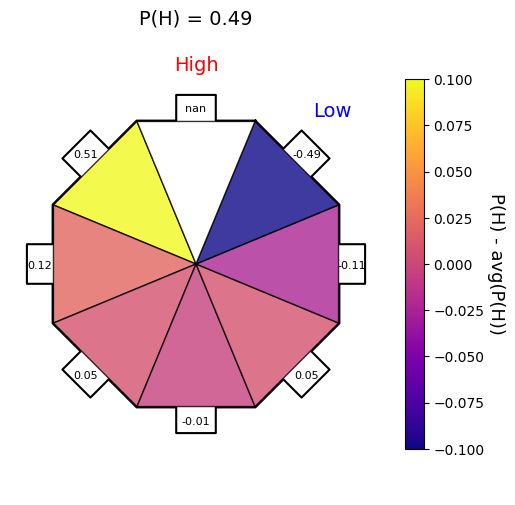

45° wall separation, LW visible first


In [239]:
fig, ax = plt.subplots(figsize=(6,6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, probabilities_list)

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, probabilities_list)

#add wall labels
alcove_centers = plot_octagon.return_alcove_centre_points()

alcove_center1_x, alcove_center1_y = alcove_centers[:,0]
alcove_center2_x, alcove_center2_y = alcove_centers[:,1]

ax.text(alcove_center1_x, alcove_center1_y + 5, f'{"High"}', 
                ha='center', va='center', fontsize=14, color='Red')
ax.text(alcove_center2_x + 3, alcove_center2_y + 5, f'{"Low"}', 
                ha='center', va='center', fontsize=14, color='Blue')

#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmax=max(probabilities_list), vmin=min(probabilities_list)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)

rounded_probability = round(overall_probability, 2)
plt.title(f"P(H) = {rounded_probability}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print("45° wall separation, LW visible first")

(2, 8)


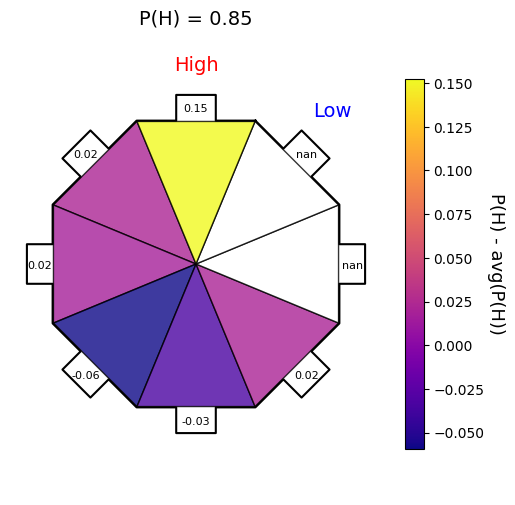

45° wall separation, HW visible first


In [247]:
fig, ax = plt.subplots(figsize=(6,6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, probabilities_list)

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, probabilities_list)

#add wall labels
alcove_centers = plot_octagon.return_alcove_centre_points()

alcove_center1_x, alcove_center1_y = alcove_centers[:,0]
alcove_center2_x, alcove_center2_y = alcove_centers[:,1]

ax.text(alcove_center1_x, alcove_center1_y + 5, f'{"High"}', 
                ha='center', va='center', fontsize=14, color='Red')
ax.text(alcove_center2_x + 3, alcove_center2_y + 5, f'{"Low"}', 
                ha='center', va='center', fontsize=14, color='Blue')

#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmax=max(probabilities_list), vmin=min(probabilities_list)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)

rounded_probability = round(overall_probability, 2)
plt.title(f"P(H) = {rounded_probability}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print("45° wall separation, HW visible first")

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, probabilities_list)

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, probabilities_list)

#add wall labels
alcove_centers = plot_octagon.return_alcove_centre_points()

alcove_center1_x, alcove_center1_y = alcove_centers[:,0]
alcove_center2_x, alcove_center2_y = alcove_centers[:,1]

ax.text(alcove_center1_x, alcove_center1_y + 5, f'{"High"}', 
                ha='center', va='center', fontsize=14, color='Red')
ax.text(alcove_center2_x + 3, alcove_center2_y + 5, f'{"Low"}', 
                ha='center', va='center', fontsize=14, color='Blue')

#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmax=max(probabilities_list), vmin=min(probabilities_list)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)

rounded_probability = round(overall_probability, 2)
plt.title(f"P(H) = {rounded_probability}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print("45° wall separation, both visible first")

(2, 8)


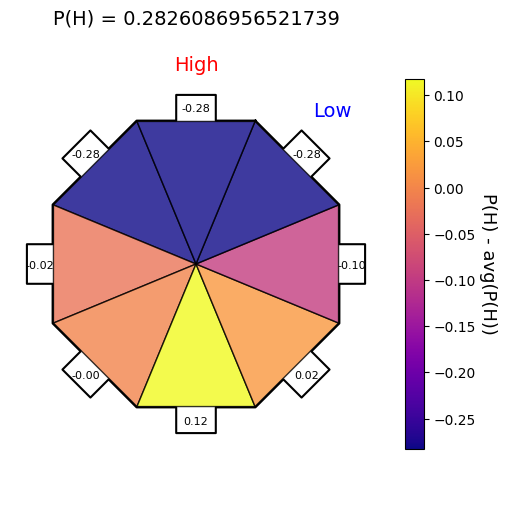

90° wall separation, LW visible first


In [256]:
fig, ax = plt.subplots(figsize=(6,6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, probabilities_list_90_LW)

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, probabilities_list_90_LW)

#add wall labels
alcove_centers = plot_octagon.return_alcove_centre_points()

alcove_center1_x, alcove_center1_y = alcove_centers[:,0]
alcove_center2_x, alcove_center2_y = alcove_centers[:,1]

ax.text(alcove_center1_x, alcove_center1_y + 5, f'{"High"}', 
                ha='center', va='center', fontsize=14, color='Red')
ax.text(alcove_center2_x + 3, alcove_center2_y + 5, f'{"Low"}', 
                ha='center', va='center', fontsize=14, color='Blue')

#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmax=max(probabilities_list_90_LW), vmin=min(probabilities_list_90_LW)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)

rounded_probability = round(overall_probability_90_LW, 2)
plt.title(f"P(H) = {overall_probability_90_LW}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print("90° wall separation, LW visible first")

^^^ ignore wall labels

In [262]:
updated_list = flip_rotate_headangle_functions.process_and_update_trials_both_players(example_list)

In [275]:
trial_list_filtered, original_indices = wall_first_visible_filtering(example_list, 0, True, 110, 1, both=False)
trial_list_filtered, original_indices = filter_trials_headangle_bin(trial_list_filtered, 0, head_angle_bin=1, updated=True, original_indices=original_indices)


115
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
And the number of valid trials at this step is 39
[  4   8   9  11  15  16  18  21  29  33  35  36  40  42  43  44  47  52
  55  56  58  61  65  67  68  69  70  76  80  85  87  89  92  96  99 102
 105 108 111]


In [278]:
print(original_indices)

{1: array([91])}


In [277]:
trial_list_filtered, original_indices = wall_first_visible_filtering(example_list, 1, True, 110, 1, both=False)
trial_list_filtered, original_indices = filter_trials_headangle_bin(trial_list_filtered, 1, head_angle_bin=1, updated=True, original_indices=original_indices)


95
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
And the number of valid trials at this step is 35
[  3  17  24  42  43  48  51  55  56  58  60  61  62  63  64  65  66  68
  71  72  76  79  80  87  91  93  98 101 102 109 110 112 115 116 118]


In [284]:
print(type(trial_list_filtered[1])


<class 'list'>


weird trial:
LW seen first for head angle bin 1
head angle over time points flipped and rotated and first head angle original trial

<Axes: >

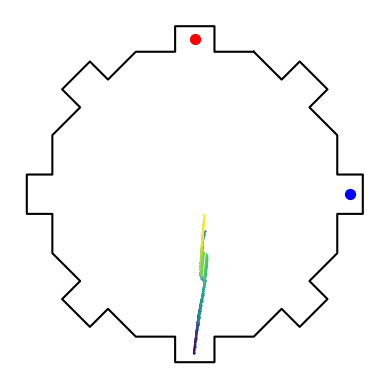

In [289]:
trial_list = flip_rotate_headangle_functions.process_and_update_trials(trial_list_filtered[1], 1)
trial=trial_list[0]
this_trial = extract_trial.extract_trial(trial, trial_list, 0)
ax = plot_octagon.plot_octagon()
plot_headangle_vectors_colour_map.plot_trial_headangle_vectors_colour_map(ax, trial_list=trial_list, trial=this_trial, player_id=1, cmap=mpl.cm.viridis, flip_rotate_walls=True)


-0.12185418605804672 18.687763214111328


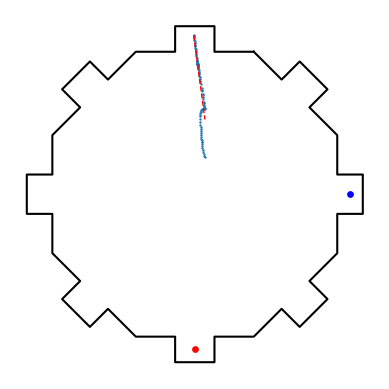

In [288]:
ax = plot_octagon.plot_octagon()

trial=trial_list[0]
    
trajectory = trajectory_vectors.extract_trial_player_trajectory(trial=trial, player_id=1)
headangles = trajectory_vectors.extract_trial_player_headangles(trial=trial, player_id=1)
trial_player_headangles =  trajectory_headangle.get_player_headangle_vectors_for_trial(headangles)
trial_player_headangles_smoothed = trajectory_headangle.get_smoothed_player_head_angle_vectors_for_trial(headangles, window_size=5)
    
    
start_index=0
x_start = trajectory[0,start_index]
y_start = trajectory[1,start_index]
x_gradient = trial_player_headangles_smoothed[0,start_index]
y_gradient = trial_player_headangles_smoothed[1,start_index]
vector_length = 10
start = [x_start, y_start]
print(x_start, y_start)
end = [x_start + x_gradient*vector_length, y_start + y_gradient*vector_length]

head_direction_vector_coordinates = np.array(list(zip(start,end)))
    
ax.scatter(trajectory[0,:], trajectory[1,:], s=0.5)
ax.plot(head_direction_vector_coordinates[0,:], head_direction_vector_coordinates[1,:], c='r', linestyle='--', linewidth=1)
    
# plot Red and Blue dots to identify the High and Low walls respectively
walls = get_indices.get_walls(trial)
wall1_index = walls[0] - 1
wall2_index = walls[1] - 1
alcove_coordinates = plot_octagon.return_alcove_centre_points()
plt.scatter(alcove_coordinates[0,wall1_index], alcove_coordinates[1,wall1_index], c='r', s=15)
plt.scatter(alcove_coordinates[0,wall2_index], alcove_coordinates[1,wall2_index], c='b', s=15)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

 

plt.show()



(2, 8)


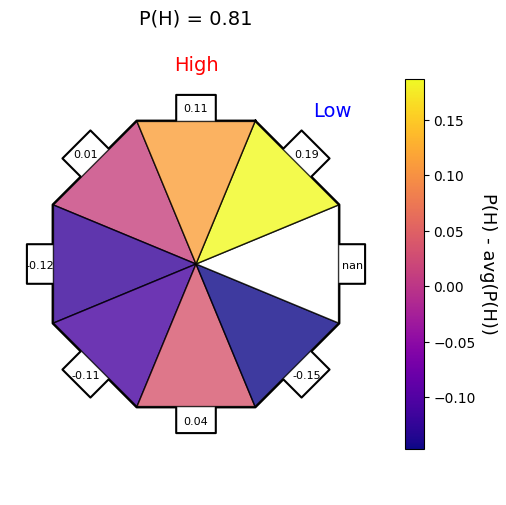

90° wall separation, HW visible first


In [297]:
fig, ax = plt.subplots(figsize=(6,6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, probabilities_list)

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, probabilities_list)

#add wall labels
alcove_centers = plot_octagon.return_alcove_centre_points()

alcove_center1_x, alcove_center1_y = alcove_centers[:,0]
alcove_center3_x, alcove_center3_y = alcove_centers[:,2]

ax.text(alcove_center1_x, alcove_center1_y + 5, f'{"High"}', 
                ha='center', va='center', fontsize=14, color='Red')
ax.text(alcove_center3_x + 3, alcove_center3_y + 5, f'{"Low"}', 
                ha='center', va='center', fontsize=14, color='Blue')

#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmax=max(probabilities_list), vmin=min(probabilities_list)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)

rounded_probability = round(overall_probability, 2)
plt.title(f"P(H) = {rounded_probability}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print("90° wall separation, HW visible first")

(2, 8)


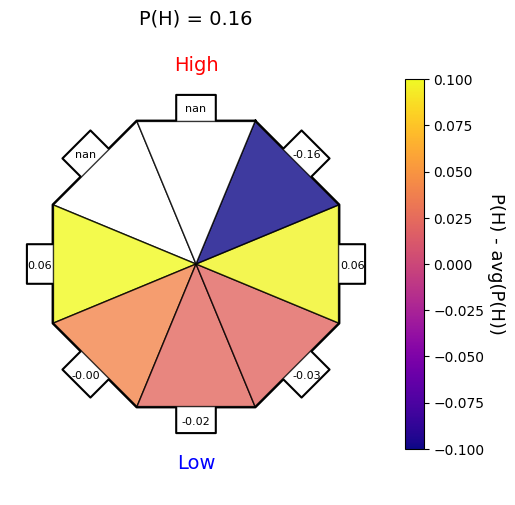

180° wall separation, LW visible first


In [305]:
fig, ax = plt.subplots(figsize=(6,6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, probabilities_list)

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, probabilities_list)

#add wall labels
alcove_centers = plot_octagon.return_alcove_centre_points()

alcove_center1_x, alcove_center1_y = alcove_centers[:,0]
alcove_center4_x, alcove_center4_y = alcove_centers[:,4]

ax.text(alcove_center1_x, alcove_center1_y + 5, f'{"High"}', 
                ha='center', va='center', fontsize=14, color='Red')
ax.text(alcove_center4_x, alcove_center4_y - 5, f'{"Low"}', 
                ha='center', va='center', fontsize=14, color='Blue')

#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmax=max(probabilities_list), vmin=min(probabilities_list)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)

rounded_probability = round(overall_probability, 2)
plt.title(f"P(H) = {rounded_probability}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print("180° wall separation, LW visible first")

(2, 8)


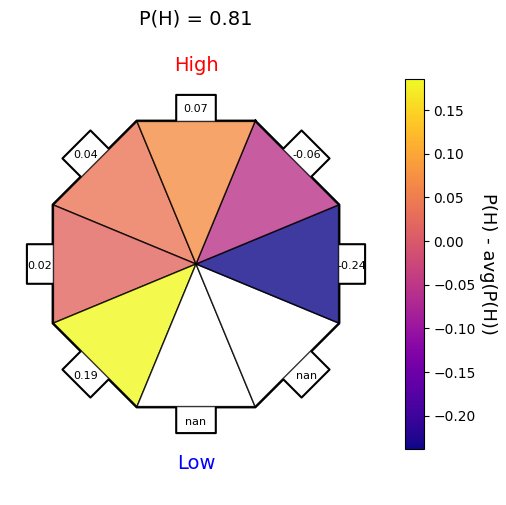

180° wall separation, HW visible first


In [314]:
fig, ax = plt.subplots(figsize=(6,6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, probabilities_list)

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, probabilities_list)

#add wall labels
alcove_centers = plot_octagon.return_alcove_centre_points()

alcove_center1_x, alcove_center1_y = alcove_centers[:,0]
alcove_center4_x, alcove_center4_y = alcove_centers[:,4]

ax.text(alcove_center1_x, alcove_center1_y + 5, f'{"High"}', 
                ha='center', va='center', fontsize=14, color='Red')
ax.text(alcove_center4_x, alcove_center4_y - 5, f'{"Low"}', 
                ha='center', va='center', fontsize=14, color='Blue')

#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmax=max(probabilities_list), vmin=min(probabilities_list)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)

rounded_probability = round(overall_probability, 2)
plt.title(f"P(H) = {rounded_probability}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print("180° wall separation, HW visible first")